Dataset: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification

# Imports 

In [11]:
import tensorflow as tf
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preparing data

In [12]:
df = pd.read_csv("cards.csv")
df

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
...,...,...,...,...,...
8150,52,valid/two of spades/1.jpg,two of spades,two,valid
8151,52,valid/two of spades/2.jpg,two of spades,two,valid
8152,52,valid/two of spades/3.jpg,two of spades,two,valid
8153,52,valid/two of spades/4.jpg,two of spades,two,valid


In [13]:
def show_images():
    fig, ax = plt.subplots(1, 5, figsize=(10, 10))
    image_index = 0
    for index in range(1, 6):
        path = f"train/ace of clubs/00{index}.jpg"
        image = Image.open(path)
        ax[image_index].imshow(image)
        ax[image_index].axis('off')
        image_index+=1

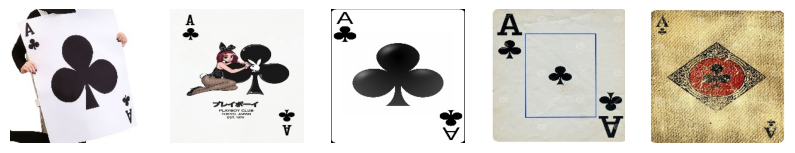

In [14]:
show_images()

In [15]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                  zoom_range = 0.1,
                                                                  shear_range = 0.2,
                                                                  vertical_flip=True,
                                                                  horizontal_flip = True,
                                                                  rotation_range = 360)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [16]:
train_ds = train_generator.flow_from_directory('train/',
                                              target_size = (200, 200),
                                              batch_size = 32,
                                              class_mode = 'categorical')
valid_ds = train_generator.flow_from_directory('valid/',
                                              target_size = (200, 200),
                                              class_mode = 'categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


# Modelling

In [17]:
cnn = tf.keras.models.Sequential()
# Input layer 
cnn.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = 3, activation = 'relu' ,input_shape = [200, 200, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
# Hidden layer
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
# Flatten 
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
# Output
cnn.add(tf.keras.layers.Dense(units=53, activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 192)     5376      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 192)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 128)       221312    
                                                                 
 conv2d_7 (Conv2D)           (None, 95, 95, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 48)       

In [19]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Training

In [20]:
cnn.fit_generator(train_ds, validation_data = valid_ds, epochs = 64)

/tmp/ipykernel_40/3224199195.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train_ds, validation_data = valid_ds, epochs = 64)


Epoch 1/64


2023-04-11 22:37:32.229065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  1/239 [..............................] - ETA: 20:19 - loss: 3.9778 - accuracy: 0.0312

2023-04-11 22:37:37.194681: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.11GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-11 22:37:37.194756: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.98GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


239/239 [==============================] - ETA: 0s - loss: 3.7252 - accuracy: 0.0818

2023-04-11 22:38:49.641368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


239/239 [==============================] - 80s 316ms/step - loss: 3.7252 - accuracy: 0.0818 - val_loss: 3.2644 - val_accuracy: 0.1396
Epoch 2/64
239/239 [==============================] - 87s 362ms/step - loss: 2.9867 - accuracy: 0.1902 - val_loss: 2.3441 - val_accuracy: 0.2981
Epoch 3/64
239/239 [==============================] - 79s 330ms/step - loss: 2.4268 - accuracy: 0.3063 - val_loss: 2.1749 - val_accuracy: 0.3019
Epoch 4/64
239/239 [==============================] - 81s 337ms/step - loss: 2.1867 - accuracy: 0.3749 - val_loss: 1.9745 - val_accuracy: 0.4038
Epoch 5/64
239/239 [==============================] - 77s 323ms/step - loss: 2.0096 - accuracy: 0.4277 - val_loss: 1.7562 - val_accuracy: 0.4528
Epoch 6/64
239/239 [==============================] - 74s 310ms/step - loss: 1.8920 - accuracy: 0.4618 - val_loss: 1.6291 - val_accuracy: 0.5208
Epoch 7/64
239/239 [==============================] - 75s 314ms/step - loss: 1.8017 - accuracy: 0.4860 - val_loss: 1.5658 - val_accuracy: 0.5

KeyboardInterrupt: 

# Evaluation

In [23]:
test_ds = test_generator.flow_from_directory('test/',
                                              target_size = (200, 200),
                                              class_mode = 'categorical')

Found 265 images belonging to 53 classes.


In [24]:
cnn.evaluate(test_ds, batch_size = 32)

2023-04-11 23:41:58.081899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9/9 [==============================] - 3s 292ms/step - loss: 1.3288 - accuracy: 0.7208


[1.3288226127624512, 0.7207547426223755]

# Save weights

In [25]:
cnn.save_weights("CardsRecognitionWeiths.h5")